//  ~ https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.html

## Site location problem

### Imagine you are a factory location analyst and you've been asked to help locate a factory that makes rock aggregate somewhere in the UK.

The company you've been dealing with want to experiment with several factors that they think are important in the location process. They want an application that combines maps of the UK that represent the things that are important to them. Each map has a shading intensity which represents the best areas on the basis of different factors. For example, on the population map the areas near near city centres will be lighter than other areas. The maps need weights attributing to them depending on GUI scrollbars that the company execs can play with. They like that kind of thing.

The maps are stored in files containing values between 0 and 255. 255 represents the best areas.

### Write a Jupyter Notebook which does the following.

1. Takes in three maps of the UK: one which displays the importance of transport; one good geology areas; one population workforce. The higher the figures, the better the place for the company.

In [13]:
# take in three maps of the UK...

import csv
import urllib.request
import codecs

def get_csv_map(url):
    array = []
    ftpstream = urllib.request.urlopen(url)
    csvfile = csv.reader(codecs.iterdecode(ftpstream, 'utf-8'))
    for line in csvfile:
        integers = []
        for value in line:
            integer_value = int(value)
            integers.append(integer_value)
        array.append(integers)
    return array
        
transport = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.mway')
geology = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.geology')
population = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.pop')

In [19]:
# check that's worked by drawing the maps

import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = [9.5,6]

maps = [transport, geology, population]

from ipywidgets import interact, widgets

def f(Map):
    plt.imshow(maps[Map])
    return Map

print("0 for Transport, 1 for Geology, 2 for Population")
interact(f, Map=widgets.IntSlider(min=0, max=2, step=1, value=1))





0 for Transport, 1 for Geology, 2 for Population


interactive(children=(IntSlider(value=1, description='Map', max=2), Output()), _dom_classes=('widget-interact'…

<function __main__.f(Map)>

2. Makes a display that combines/merges the maps, with the weighting on each map determined by one of three scrollbars, and displays them combined. I.e. if you turn up the scrollbars for geology and population and turn down the one for transport, the first two maps will be merged and the shading on the map will be 50 percent due to each. For a badly coded example see [here](http://www.ccg.leeds.ac.uk/teaching/nuclearwaste/).

    To do this, take the three values for each pixel (one value from the geology, one from the population, one from the transport), and multiple each by the scrollbar value for that map. Then add the values from the three maps together. Repeat this for all the pixels, and then re-range the dataset so that the numbers come out in the 0 to 255 range. Use this dataset to then construct a **grayscale** image.

interactive(children=(IntSlider(value=50, description='transport_weight'), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=50, description='geology_weight'), Output()), _dom_classes=('widget-inte…

interactive(children=(IntSlider(value=50, description='population_weight'), Output()), _dom_classes=('widget-i…

Button(description='Show Combined', style=ButtonStyle())

Output()

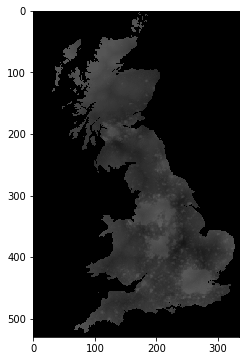

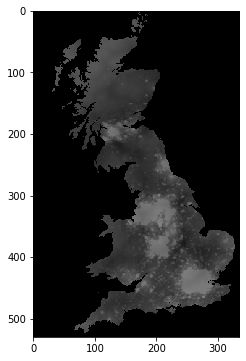

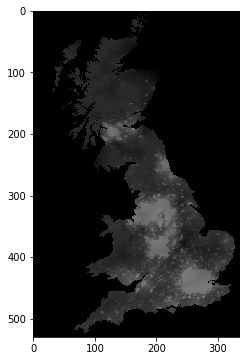

In [21]:
# make a display that combines/merges the maps,  
# with weighting on each map determined by one of three scrollbars
# and displays them combined

from ipywidgets import interact

t_weight = 100
g_weight = 100
p_weight = 100

def f(transport_weight):
    global t_weight
    t_weight = transport_weight
    return transport_weight

def g(geology_weight):
    global g_weight
    g_weight = geology_weight
    return geology_weight

def h(population_weight):
    global p_weight    
    p_weight = population_weight
    return population_weight

interact(f, transport_weight=widgets.IntSlider(min=0, max=100, step=1, value=50))
interact(g, geology_weight=widgets.IntSlider(min=0, max=100, step=1, value=50))
interact(h, population_weight=widgets.IntSlider(min=0, max=100, step=1, value=50))

map = []

def aggregate_map(transport_weight, geology_weight, population_weight):
    t = transport_weight/100
    g = geology_weight/100
    p = population_weight/100

    global map
    map = []

    for row_number in range(len(transport)):
        aggregate_row = []
        for column_number in range(len(transport[0])):
            value = transport[row_number][column_number]*t + geology[row_number][column_number]*g + population[row_number][column_number]*p
            aggregate_row.append(int(value/3))
        map.append(aggregate_row)
    
    plt.imshow(map, cmap='gray', vmin=0, vmax=255)

from IPython.display import display
from IPython.display import clear_output
button = widgets.Button(description="Show Combined")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        clear_output()
        print(t_weight, g_weight, p_weight)
        aggregate_map(t_weight,g_weight,p_weight)

button.on_click(on_button_clicked)


3. Allows the user of the Notebook to save the weighted map they are happiest with as a raster style comma-separated text file where each line equals one line of the image. The figures should range between 0 and 255.

In [24]:
# save map as csv

with open(f'{t_weight}-{g_weight}-{p_weight}-sitelocation_file.csv', 'w') as sitelocation_file:
    for row in map:
        for value in row:
            sitelocation_file.write(str(value)+',')
        sitelocation_file.write('\n')

### Additional marks are awarded for the following.

Allow them to display the top 10 percent of the areas in blue if they want, then return it to greyscale. The lightness of the blue should still reflect the underlying values.

### Files for this project.

3 x raster files representing the geology, transport network, and population density of the UK. All files listed from top left to bottom right. Each line is a line in the raster.

- [Geology](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.geology) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestgeology.gif) for comparison, don't use this in the project.)
- [Transport](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.mway) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestmway.gif) for comparison, don't use this in the project.)
- [Population](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.pop) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestpop.gif) for comparison, don't use this in the project.)